# Final figures for PIK3CA story

### Standard Imports

In [28]:
import pandas as pd
import numpy as np
import re
import scipy.stats
import statsmodels.stats.multitest
import matplotlib.pyplot as plt
import seaborn as sns
import json
import operator

#import the Endometrial data from CPTAC package
import CPTAC.Endometrial as CPTAC

### Get proteomics data from CPTAC

In [29]:
proteomics = CPTAC.get_proteomics()

### Make Proteomics box plot for AKT1, AKT2, PTEN, PIK3CA

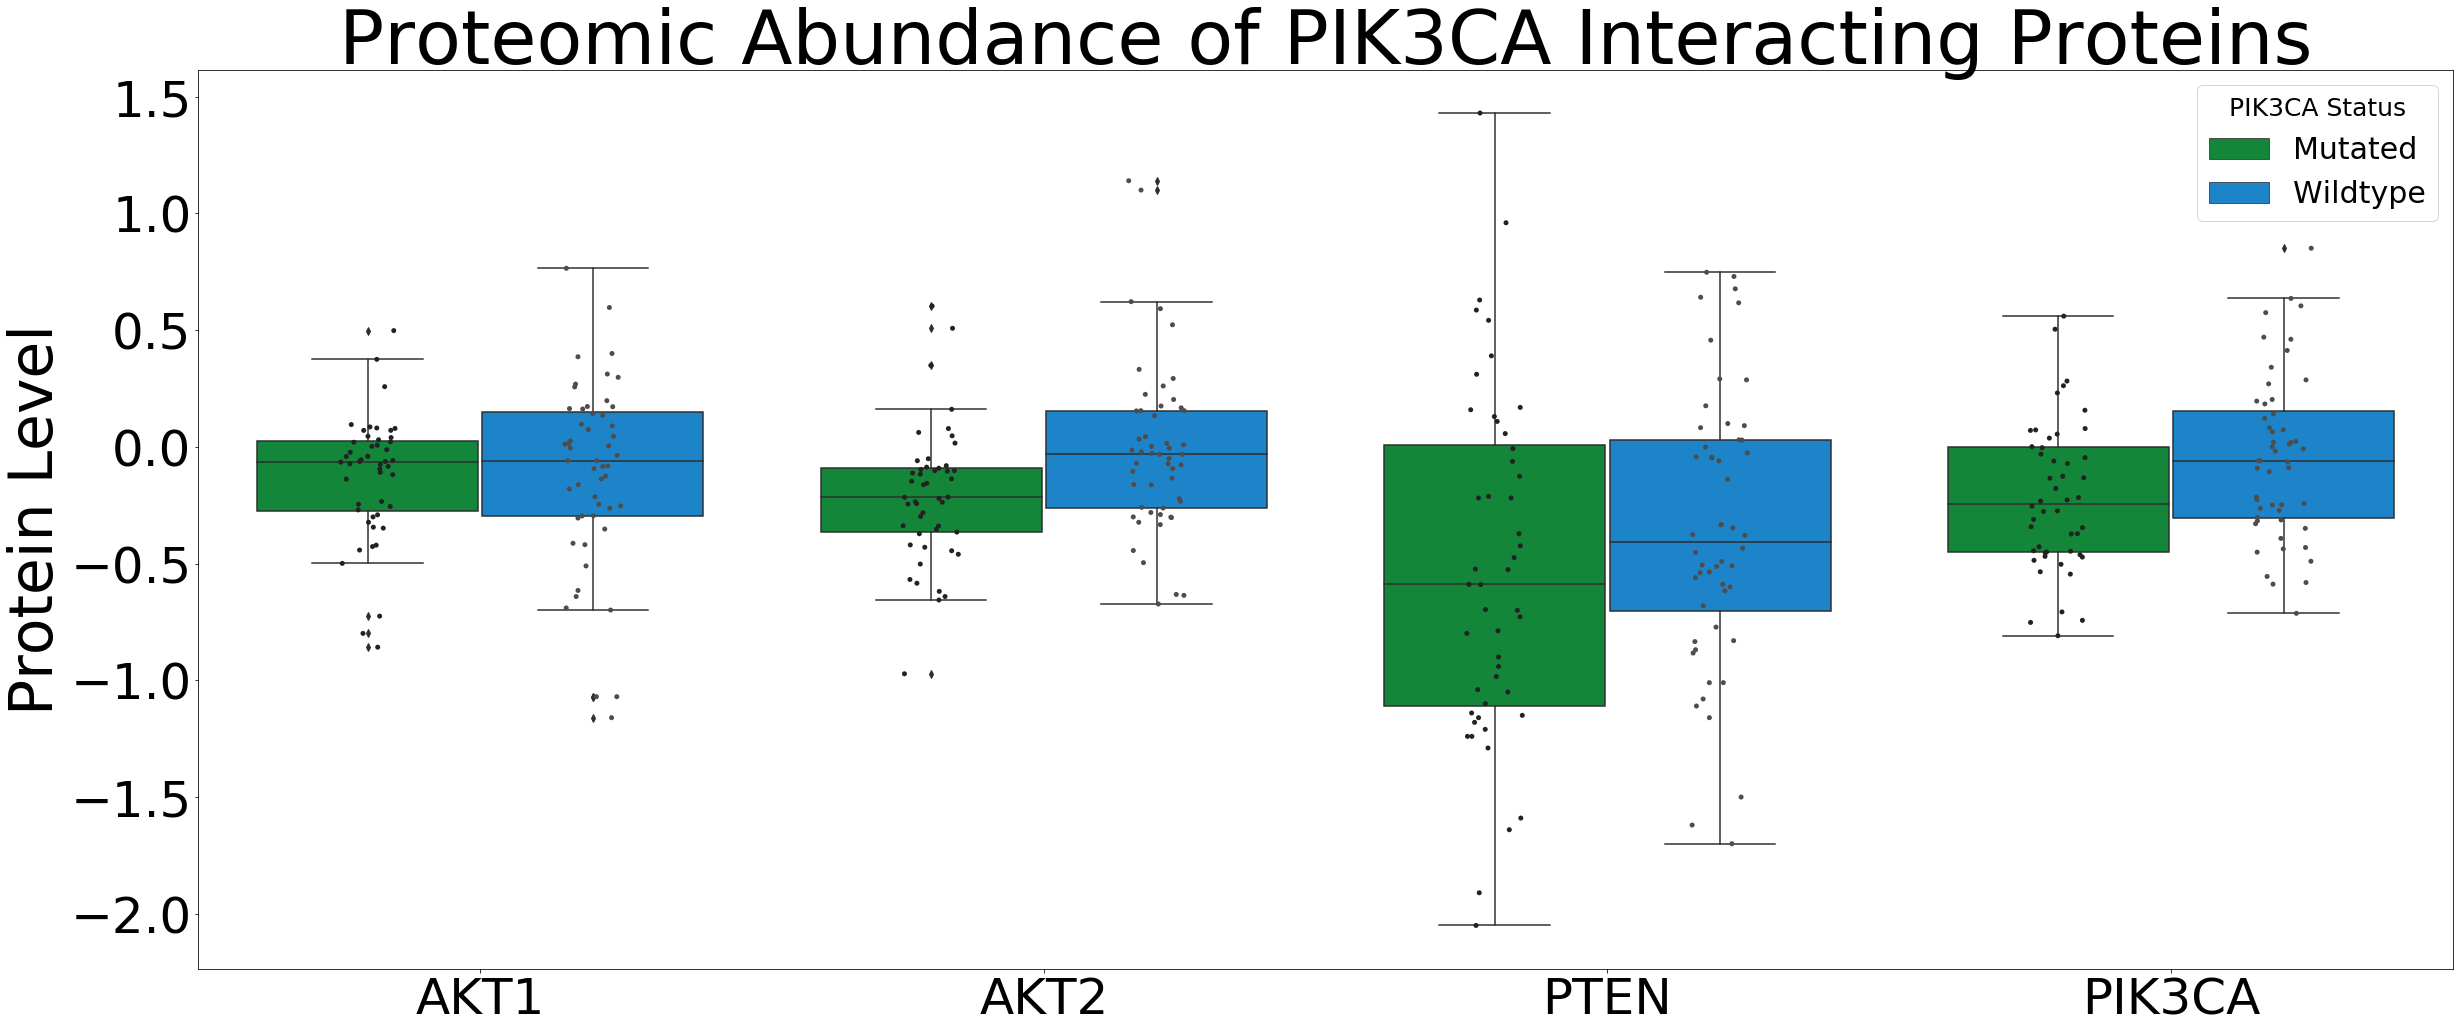

In [30]:
gene = 'PIK3CA'
protList = ['AKT1','AKT2','PTEN','PIK3CA']

'''Get the PIK3CA mutation dataframe'''
plotdf = CPTAC.compare_mutations(proteomics, gene)

'''Look only at Tumor patients'''
plotdf = plotdf.loc[plotdf['Patient_Type'] == 'Tumor'][['Mutation']]

'''Add in the protein levels for every protein in the list'''
for protein in protList:
    proteindf = CPTAC.compare_mutations(proteomics, protein, gene)
    proteindf = proteindf.loc[proteindf['Patient_Type'] == 'Tumor']
    proteindf = proteindf[[protein]]
    plotdf = plotdf.join(proteindf)

'''Reformate the datafram to classify all mutations as "mutation", leave "wildtype" as is.'''
plotdf = plotdf.replace({'Mutation': {'Frame_Shift_Del': 'Mutation',
                                      'Frame_Shift_Ins': 'Mutation',
                                      'Nonsense_Mutation': 'Mutation',
                                      'Missense_Mutation': 'Mutation',
                                      'In_Frame_Del': 'Mutation'
                                     }})
'''Reformat dataframe for plot'''
plotdf = pd.melt(plotdf, id_vars=['Mutation'], var_name='Protein', value_name='Signal')
plotdf = plotdf.dropna(axis=0)

'''Create the plot'''
a4_dims = (40.4, 16.54)
fig, ax = plt.subplots(figsize=a4_dims)
my_pal = {"Mutation": "#009933", "Wildtype": "#008ae6"}
boxplt = sns.boxplot(x='Protein', y='Signal', hue='Mutation', data=plotdf, palette=my_pal)
boxplt = sns.stripplot(data=plotdf, x='Protein', y='Signal', hue='Mutation', dodge=True, jitter=True, color='.3')
boxplt.set_xlabel('')
boxplt.set_ylabel('Protein Level', fontsize='60')
boxplt.tick_params(labelsize='50')
boxplt.set_title('Proteomic Abundance of PIK3CA Interacting Proteins', fontsize = '75')

'''Adjust the legend'''
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[0:2], ['Mutated', 'Wildtype'], title='PIK3CA Status', fontsize='30', frameon=True)
boxplt.get_legend().get_title().set_fontsize('25')


'''Show Plot'''
fig = boxplt.get_figure()
plt.show()